In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv('houseprice.csv',usecols=["SalePrice", "MSSubClass", "MSZoning", "LotFrontage", "LotArea", "Street", "YearBuilt", "LotShape", "1stFlrSF", "2ndFlrSF"]).dropna()

In [3]:
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,YearBuilt,1stFlrSF,2ndFlrSF,SalePrice
0,60,RL,65.0,8450,Pave,Reg,2003,856,854,208500
1,20,RL,80.0,9600,Pave,Reg,1976,1262,0,181500
2,60,RL,68.0,11250,Pave,IR1,2001,920,866,223500
3,70,RL,60.0,9550,Pave,IR1,1915,961,756,140000
4,60,RL,84.0,14260,Pave,IR1,2000,1145,1053,250000


In [4]:
df.shape

(1201, 10)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1201 entries, 0 to 1459
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MSSubClass   1201 non-null   int64  
 1   MSZoning     1201 non-null   object 
 2   LotFrontage  1201 non-null   float64
 3   LotArea      1201 non-null   int64  
 4   Street       1201 non-null   object 
 5   LotShape     1201 non-null   object 
 6   YearBuilt    1201 non-null   int64  
 7   1stFlrSF     1201 non-null   int64  
 8   2ndFlrSF     1201 non-null   int64  
 9   SalePrice    1201 non-null   int64  
dtypes: float64(1), int64(6), object(3)
memory usage: 103.2+ KB


In [6]:
for i in df.columns:
  print("Column name {} and unique value {}".format(i,len(df[i].unique())))

Column name MSSubClass and unique value 15
Column name MSZoning and unique value 5
Column name LotFrontage and unique value 110
Column name LotArea and unique value 869
Column name Street and unique value 2
Column name LotShape and unique value 4
Column name YearBuilt and unique value 112
Column name 1stFlrSF and unique value 678
Column name 2ndFlrSF and unique value 368
Column name SalePrice and unique value 597


In [7]:
import datetime
print(datetime.datetime.now().year)

2024


In [8]:
df["total year"]=datetime.datetime.now().year-df["YearBuilt"]

In [9]:
df.drop("YearBuilt",axis=1,inplace=True)

In [10]:
df.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', '1stFlrSF', '2ndFlrSF', 'SalePrice', 'total year'],
      dtype='object')

In [11]:
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,1stFlrSF,2ndFlrSF,SalePrice,total year
0,60,RL,65.0,8450,Pave,Reg,856,854,208500,21
1,20,RL,80.0,9600,Pave,Reg,1262,0,181500,48
2,60,RL,68.0,11250,Pave,IR1,920,866,223500,23
3,70,RL,60.0,9550,Pave,IR1,961,756,140000,109
4,60,RL,84.0,14260,Pave,IR1,1145,1053,250000,24


In [12]:
cat_feature=["MSSubClass","MSZoning","Street","LotShape"]
out_features="SalePrice"

In [13]:
#we use label encoder because of for embedding layer
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df["MSSubClass"]=le.fit_transform(df["MSSubClass"])

In [14]:
df["MSSubClass"]

0       5
1       0
2       5
3       6
4       5
       ..
1455    5
1456    0
1457    6
1458    0
1459    0
Name: MSSubClass, Length: 1201, dtype: int64

In [15]:
df.MSSubClass.unique()

array([ 5,  0,  6,  4, 14,  3, 10, 11,  1,  8, 12,  7, 13,  2,  9])

In [16]:
#using label encoder for all cat columns
for i in cat_feature:
  df[i]=le.fit_transform(df[i])

In [17]:
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,1stFlrSF,2ndFlrSF,SalePrice,total year
0,5,3,65.0,8450,1,3,856,854,208500,21
1,0,3,80.0,9600,1,3,1262,0,181500,48
2,5,3,68.0,11250,1,0,920,866,223500,23
3,6,3,60.0,9550,1,0,961,756,140000,109
4,5,3,84.0,14260,1,0,1145,1053,250000,24


In [40]:
#convert categorical values int sstacking and then into tensors
ca_fea=np.stack([df['MSSubClass'],df['MSZoning'],df['Street'],df['LotShape']],1)
ca_fea.shape

(1201, 4)

In [42]:
#numpy to tensor
import torch
ca_fea=torch.tensor(ca_fea,dtype=torch.int64)
ca_fea

tensor([[5, 3, 1, 3],
        [0, 3, 1, 3],
        [5, 3, 1, 0],
        ...,
        [6, 3, 1, 3],
        [0, 3, 1, 3],
        [0, 3, 1, 3]])

In [20]:
cont_features=[]
for i in df.columns:
  if i in ["MSSubClass","MSZoning","Street","LotShape","SalePrice"]:
    pass
  else:
    cont_features.append(i)

In [21]:
cont_features

['LotFrontage', 'LotArea', '1stFlrSF', '2ndFlrSF', 'total year']

In [22]:
cont_values=np.stack([df[i] for i in cont_features],1)
cont_values=torch.tensor(cont_values,dtype=torch.float)
cont_values

tensor([[   65.,  8450.,   856.,   854.,    21.],
        [   80.,  9600.,  1262.,     0.,    48.],
        [   68., 11250.,   920.,   866.,    23.],
        ...,
        [   66.,  9042.,  1188.,  1152.,    83.],
        [   68.,  9717.,  1078.,     0.,    74.],
        [   75.,  9937.,  1256.,     0.,    59.]])

In [23]:
cont_values.dtype

torch.float32

In [24]:
y=torch.tensor(df["SalePrice"].values,dtype=torch.float).reshape(-1,1)
y

tensor([[208500.],
        [181500.],
        [223500.],
        ...,
        [266500.],
        [142125.],
        [147500.]])

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1201 entries, 0 to 1459
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MSSubClass   1201 non-null   int64  
 1   MSZoning     1201 non-null   int64  
 2   LotFrontage  1201 non-null   float64
 3   LotArea      1201 non-null   int64  
 4   Street       1201 non-null   int64  
 5   LotShape     1201 non-null   int64  
 6   1stFlrSF     1201 non-null   int64  
 7   2ndFlrSF     1201 non-null   int64  
 8   SalePrice    1201 non-null   int64  
 9   total year   1201 non-null   int64  
dtypes: float64(1), int64(9)
memory usage: 103.2 KB


In [26]:
ca_fea.shape,cont_values.shape,y.shape

(torch.Size([1201, 4]), torch.Size([1201, 5]), torch.Size([1201, 1]))

In [27]:
#embedding is only for categorical features
cat_dims=[len(df[col].unique()) for col in ["MSSu bClass","MSZoning","Street","LotShape"]]

In [28]:
cat_dims

[15, 5, 2, 4]

In [29]:
#output dimension should be setbased on the input dimension (min(50,feature dimensio/2))
embedding_dim=[(x,min(50,(x+1)//2)) for x in cat_dims]

In [34]:
##preprocessing step
embedding_dim

[(15, 8), (5, 3), (2, 1), (4, 2)]

In [33]:
import torch
import torch.nn as nn
import torch.nn.functional as F
embed_representation=nn.ModuleList([nn.Embedding(inp,out) for inp,out in embedding_dim])
embed_representation

ModuleList(
  (0): Embedding(15, 8)
  (1): Embedding(5, 3)
  (2): Embedding(2, 1)
  (3): Embedding(4, 2)
)

In [36]:
ca_fea

tensor([[5, 3, 1, 3],
        [0, 3, 1, 3],
        [5, 3, 1, 0],
        ...,
        [6, 3, 1, 3],
        [0, 3, 1, 3],
        [0, 3, 1, 3]])

In [37]:
cat_features=ca_fea[:4]
cat_features

tensor([[5, 3, 1, 3],
        [0, 3, 1, 3],
        [5, 3, 1, 0],
        [6, 3, 1, 0]])

In [43]:
embedding_sets=[]
for i,e in enumerate(embed_representation):
  embedding_sets.append(e(ca_fea[:,i]))

In [44]:
embedding_sets

[tensor([[-2.2030, -0.6355,  0.0680,  ...,  0.2769, -0.7026,  0.4852],
         [-1.4390, -2.8096,  0.0253,  ..., -1.0093,  0.7444, -0.6126],
         [-2.2030, -0.6355,  0.0680,  ...,  0.2769, -0.7026,  0.4852],
         ...,
         [ 0.6187, -0.8194,  1.3855,  ...,  0.8997, -0.2349, -0.6756],
         [-1.4390, -2.8096,  0.0253,  ..., -1.0093,  0.7444, -0.6126],
         [-1.4390, -2.8096,  0.0253,  ..., -1.0093,  0.7444, -0.6126]],
        grad_fn=<EmbeddingBackward0>),
 tensor([[-0.0096, -0.1067, -0.0808],
         [-0.0096, -0.1067, -0.0808],
         [-0.0096, -0.1067, -0.0808],
         ...,
         [-0.0096, -0.1067, -0.0808],
         [-0.0096, -0.1067, -0.0808],
         [-0.0096, -0.1067, -0.0808]], grad_fn=<EmbeddingBackward0>),
 tensor([[-0.3879],
         [-0.3879],
         [-0.3879],
         ...,
         [-0.3879],
         [-0.3879],
         [-0.3879]], grad_fn=<EmbeddingBackward0>),
 tensor([[ 0.8418, -1.6468],
         [ 0.8418, -1.6468],
         [ 0.0058,  0.

In [46]:
#stack and concat are similar but stack is used for numpy arrays and it is already in
#tensor so in tensor we have concat library so we used it
z=torch.cat(embedding_sets,1)
z

tensor([[-2.2030, -0.6355,  0.0680,  ..., -0.3879,  0.8418, -1.6468],
        [-1.4390, -2.8096,  0.0253,  ..., -0.3879,  0.8418, -1.6468],
        [-2.2030, -0.6355,  0.0680,  ..., -0.3879,  0.0058,  0.5936],
        ...,
        [ 0.6187, -0.8194,  1.3855,  ..., -0.3879,  0.8418, -1.6468],
        [-1.4390, -2.8096,  0.0253,  ..., -0.3879,  0.8418, -1.6468],
        [-1.4390, -2.8096,  0.0253,  ..., -0.3879,  0.8418, -1.6468]],
       grad_fn=<CatBackward0>)

In [47]:
dropout=nn.Dropout(.4)

In [48]:
final_embed=dropout(z)
final_embed

tensor([[-0.0000, -0.0000,  0.0000,  ..., -0.0000,  1.4030, -2.7446],
        [-2.3983, -4.6827,  0.0000,  ..., -0.6465,  1.4030, -2.7446],
        [-3.6716, -1.0592,  0.0000,  ..., -0.6465,  0.0097,  0.0000],
        ...,
        [ 1.0312, -1.3657,  0.0000,  ..., -0.6465,  0.0000, -2.7446],
        [-2.3983, -0.0000,  0.0000,  ..., -0.6465,  0.0000, -0.0000],
        [-2.3983, -4.6827,  0.0421,  ..., -0.6465,  1.4030, -0.0000]],
       grad_fn=<MulBackward0>)

In [57]:
 class FeedForwardNN(nn.Module):
  def __init__(self,embedding_dim,n_conts,out_sz,layers,p=0.5):
    super().__init__()
    self.embeds=nn.ModuleList([nn.Embedding(inp,out) for inp,out in embedding_dim])
    self.emb_drop=nn.Dropout(p)
    self.bn_cont=nn.BatchNorm1d(n_conts)

    layerlist=[]
    n_emb=sum((out for inp,out in embedding_dim))
    n_in=n_emb+n_conts
    for i in layers:
      layerlist.append(nn.Linear(n_in,i))
      layerlist.append(nn.ReLU(inplace=True))
      layerlist.append(nn.BatchNorm1d(i))
      layerlist.append(nn.Dropout(p))
      n_in=i
    layerlist.append(nn.Linear(layers[-1],out_sz))
    self.layers=nn.Sequential(*layerlist)
  def forward(self,x_cat,x_cont):
    embeddings=[]
    for i,e in enumerate(self.embeds):
      embeddings.append(e(x_cat[:,i]))
    x=torch.cat(embeddings,1)
    x=self.emb_drop(x)
    x_cont=self.bn_cont(x_cont)
    x=torch.cat([x,x_cont],1)
    x=self.layers(x)
    return x


In [52]:
len(cont_features)

5

In [58]:
torch.manual_seed(100)
model=FeedForwardNN(embedding_dim,len(cont_features),1,[100,50],0.4)

In [59]:
model

FeedForwardNN(
  (embeds): ModuleList(
    (0): Embedding(15, 8)
    (1): Embedding(5, 3)
    (2): Embedding(2, 1)
    (3): Embedding(4, 2)
  )
  (emb_drop): Dropout(p=0.4, inplace=False)
  (bn_cont): BatchNorm1d(5, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (layers): Sequential(
    (0): Linear(in_features=19, out_features=100, bias=True)
    (1): ReLU(inplace=True)
    (2): BatchNorm1d(100, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Dropout(p=0.4, inplace=False)
    (4): Linear(in_features=100, out_features=50, bias=True)
    (5): ReLU(inplace=True)
    (6): BatchNorm1d(50, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (7): Dropout(p=0.4, inplace=False)
    (8): Linear(in_features=50, out_features=1, bias=True)
  )
)

define loss

In [60]:
#later convert to rmse
loss_function=nn.MSELoss()
optimizer=torch.optim.Adam(model.parameters(),lr=0.01)

In [61]:
df.shape

(1201, 10)

In [63]:
cont_values.shape

torch.Size([1201, 5])

In [66]:
batch_size=1200
test_size=int(batch_size*0.15)
train_categorical=ca_fea[:batch_size-test_size]
test_categorical=ca_fea[batch_size-test_size:batch_size]
train_cont=cont_values[:batch_size-test_size]
test_cont=cont_values[batch_size-test_size:batch_size]
y_train=y[:batch_size-test_size]
y_test=y[batch_size-test_size:batch_size]

In [67]:
len(train_categorical)

1020

In [69]:
epochs=5000
final_losses=[]
for i in range(epochs):
  i=i+1
  y_pred=model(train_categorical,train_cont)
  loss=torch.sqrt(loss_function(y_pred,y_train))
  final_losses.append(loss)
  if(i%10==1):
    print('Epoch number: {} and the loss : {}'.format(i,loss.item()))
  optimizer.zero_grad()
  loss.backward() #backpropagation
  optimizer.step()

Epoch number: 1 and the loss : 184305.921875
Epoch number: 11 and the loss : 183996.234375
Epoch number: 21 and the loss : 183810.953125
Epoch number: 31 and the loss : 183378.640625
Epoch number: 41 and the loss : 183223.578125
Epoch number: 51 and the loss : 182900.5
Epoch number: 61 and the loss : 182555.6875
Epoch number: 71 and the loss : 182297.84375
Epoch number: 81 and the loss : 181895.390625
Epoch number: 91 and the loss : 181483.578125
Epoch number: 101 and the loss : 181314.421875
Epoch number: 111 and the loss : 180766.671875
Epoch number: 121 and the loss : 180480.40625
Epoch number: 131 and the loss : 180428.65625
Epoch number: 141 and the loss : 179885.125
Epoch number: 151 and the loss : 179518.03125
Epoch number: 161 and the loss : 179353.0
Epoch number: 171 and the loss : 178929.53125
Epoch number: 181 and the loss : 178564.34375
Epoch number: 191 and the loss : 178108.15625
Epoch number: 201 and the loss : 178094.046875
Epoch number: 211 and the loss : 177449.015625

RuntimeError: Can't call numpy() on Tensor that requires grad. Use tensor.detach().numpy() instead.

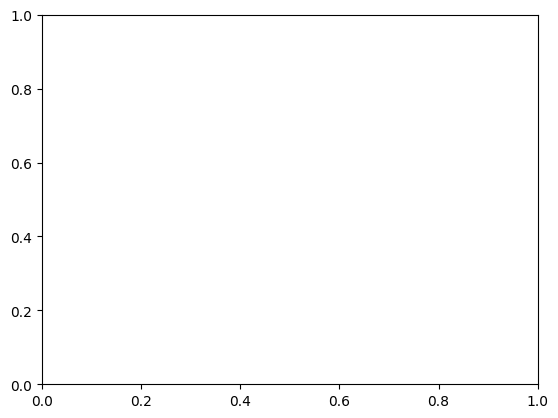

In [71]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(range(epochs),final_losses)
plt.ylabel('RMSE loss')

In [72]:
 y_pred=''
 with torch.no_grad():
  y_pred=model(test_categorical,test_cont)
  loss=torch.sqrt(loss_function(y_pred,y_test))
print("RMSE: {}".format(loss))

RMSE: 45009.03515625


In [74]:
data_verify=pd.DataFrame(y_test.tolist(),columns=["Test"])
Data_predicted=pd.DataFrame(y_pred.tolist(),columns=["Predictions"])

In [77]:
final=pd.concat([data_verify,Data_predicted],axis=1)
final["Difference"]=final["Test"]-final["Predictions"]
final.tail()

,Test,Predictions,Difference
175,185000.0,170863.328125,14136.671875
176,175000.0,186382.796875,-11382.796875
177,210000.0,235995.031250,-25995.031250
178,266500.0,189901.718750,76598.281250
179,142125.0,120171.468750,21953.531250


In [78]:
torch.save(model,'Houseprice.pt')

In [79]:
torch.save(model.state_dict(),'HouseWeights.pt')

In [80]:
embs_size=[(15, 8), (5, 3), (2, 1), (4, 2)]
model1=FeedForwardNN(embs_size,5,1,[100,50],p=0.4)

In [82]:
model1.load_state_dict(torch.load('HouseWeights.pt'))

<All keys matched successfully>

In [84]:
model1.eval()

FeedForwardNN(
  (embeds): ModuleList(
    (0): Embedding(15, 8)
    (1): Embedding(5, 3)
    (2): Embedding(2, 1)
    (3): Embedding(4, 2)
  )
  (emb_drop): Dropout(p=0.4, inplace=False)
  (bn_cont): BatchNorm1d(5, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (layers): Sequential(
    (0): Linear(in_features=19, out_features=100, bias=True)
    (1): ReLU(inplace=True)
    (2): BatchNorm1d(100, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Dropout(p=0.4, inplace=False)
    (4): Linear(in_features=100, out_features=50, bias=True)
    (5): ReLU(inplace=True)
    (6): BatchNorm1d(50, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (7): Dropout(p=0.4, inplace=False)
    (8): Linear(in_features=50, out_features=1, bias=True)
  )
)